##### Import relevant libraries

In [2]:
import pandas as pd
import numpy as numpy
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

##### Import the csv data as Pandas Dataframe

In [3]:
df = pd.read_csv('data/student_perf.csv')

In [4]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

##### Initial Checks on the Dataset

In [6]:
# Missing Values
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

##### Insights and Observations     
There are no missing values                       
##### Ways to handle missing values are                            
    1. Removing Missing Data Drop rows/columns with missing values                       
    2. Imputation Methods                      
            Fill with constant value (e.g., 0, "Unknown")/mean/median/mode/Forward fill (ffill)/Backward fill (bfill)/Interpolation (e.g., linear)/Model-based imputation (e.g., SimpleImputer, KNNImputer)

In [7]:
# Duplicate Values
df.duplicated().sum()

np.int64(0)

##### Insights and Observations              
There are no duplicate values

##### Ways to handle duplicate values are            
    1. Detecting Duplicates
        df.duplicated() – Detects duplicate rows
        df.duplicated(subset=['col1', 'col2']) – Check duplicates based on specific columns
        df[df.duplicated()] – View duplicate rows

    2. Removing Duplicates
        df.drop_duplicates()/df.drop_duplicates(keep='last')/df.drop_duplicates(subset=['col1', 'col2']) 

In [ ]:
# Null values and DTypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
# Unique values of each column
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [10]:
# Statistics of the Dataset
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


##### Insights and Observations                         
Description of Numerical data: Sample Size: 1000 students for each subject.                      
All means are close to each other.                                 
Standard deviation is around 15 for all subjects, indicating moderate variation.                                          
Minimum scores are as low as 0 (Math), 17 (Reading), and 10 (Writing).                                  
Maximum scores reach 100 in all subjects.                        
Median scores (50th percentile) are close to the means, showing fairly symmetric distributions.                       
75% of students scored at least 77 in Math, 79 in Reading and Writing, showing relatively good performance in the upper quartile.


In [13]:
print("Categories in 'Gender': ", end=" ")
print(df['gender'].unique())

print("Categories in 'Race/Ethnicity': ", end=" ")
print(df['race/ethnicity'].unique())

print("Categories in 'Parental level of education': ", end=" ")
print(df['parental level of education'].unique())

print("Categories in 'Lunch': ", end=" ")
print(df['lunch'].unique())

print("Categories in 'Test Preparation Course': ", end=" ")
print(df['test preparation course'].unique())


Categories in 'Gender':  ['female' 'male']
Categories in 'Race/Ethnicity':  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'Parental level of education':  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'Lunch':  ['standard' 'free/reduced']
Categories in 'Test Preparation Course':  ['none' 'completed']


In [ ]:
# Define Numerical and Categorical Features
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']    # dtype is not object
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']  # dtype is object

print('We have {} numerical features: {}'.format(len(numerical_features), numerical_features))
print('\nWe have {} categorical features: {}'.format(len(categorical_features), categorical_features))  #/n gives a space before next line
# print(f'We have {len(categorical_features)} categorical features: {categorical_features}')


We have 3 numerical features: ['math score', 'reading score', 'writing score']

We have 5 categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


###### Output Features
###### Adding Columns for Total Marks and Average

In [19]:
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total_score'] / 3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [24]:
reading_full_marks = df[df['reading score']==100]['average'].count()
writing_full_marks = df[df['writing score']==100]['average'].count()
maths_full_marks = df[df['math score']==100]['average'].count()

print(f'No of students with full marks in Reading: {reading_full_marks}')
print("No of students with full marks in Writing: {}".format(writing_full_marks))
print("No of students with full marks in Maths: {}".format(maths_full_marks))

No of students with full marks in Reading: 17
No of students with full marks in Writing: 14
No of students with full marks in Maths: 7


In [26]:
reading_marks_lt20 = df[df['reading score']<=20]['average'].count()
writing_marks_lt20 = df[df['writing score']<=20]['average'].count()
maths_marks_lt20 = df[df['math score']<=20]['average'].count()

print(f'No of students with marks less than 20 in Reading: {reading_marks_lt20}')
print("No of students with marks less than 20 in Writing: {}".format(writing_marks_lt20))
print("No of students with marks less than 20 in Maths: {}".format(maths_marks_lt20))

No of students with marks less than 20 in Reading: 1
No of students with marks less than 20 in Writing: 3
No of students with marks less than 20 in Maths: 4


##### Insights and Observations
Students have performed well in Reading                  
Students have performed poor in Maths

##### Visualization

Visualize average score distribution using        
        1) Histogram       
        2) Kernel Distribution Function  

Text(0.5, 1.0, 'Average scores by Gender')

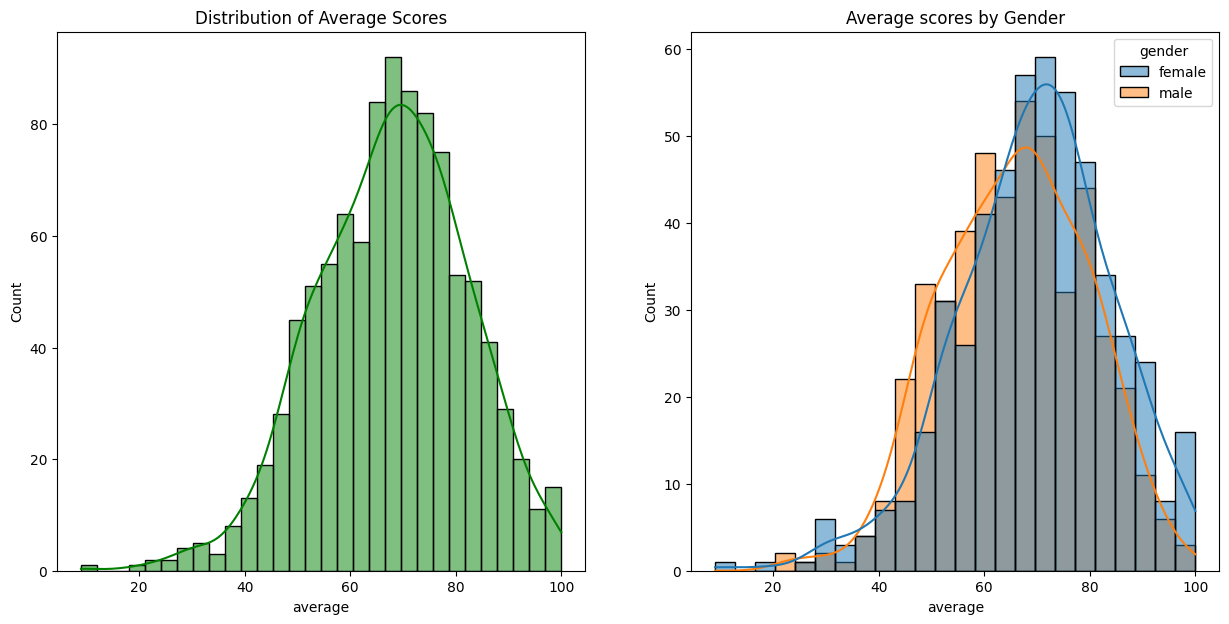

In [ ]:
fig,axs = plt.subplots(1,2,figsize=(15,7))
# first subplot
sns.histplot(data=df,x='average',bins = 30, kde=True, color='green',ax = axs[0])
axs[0].set_title("Distribution of Average Scores")
# second subplot
sns.histplot(data=df,x='average', kde=True, hue='gender',ax=axs[1])  #average score based on gender
axs[1].set_title("Average scores by Gender")

###### Insights and Observations   
Female students tend to perform better than male students

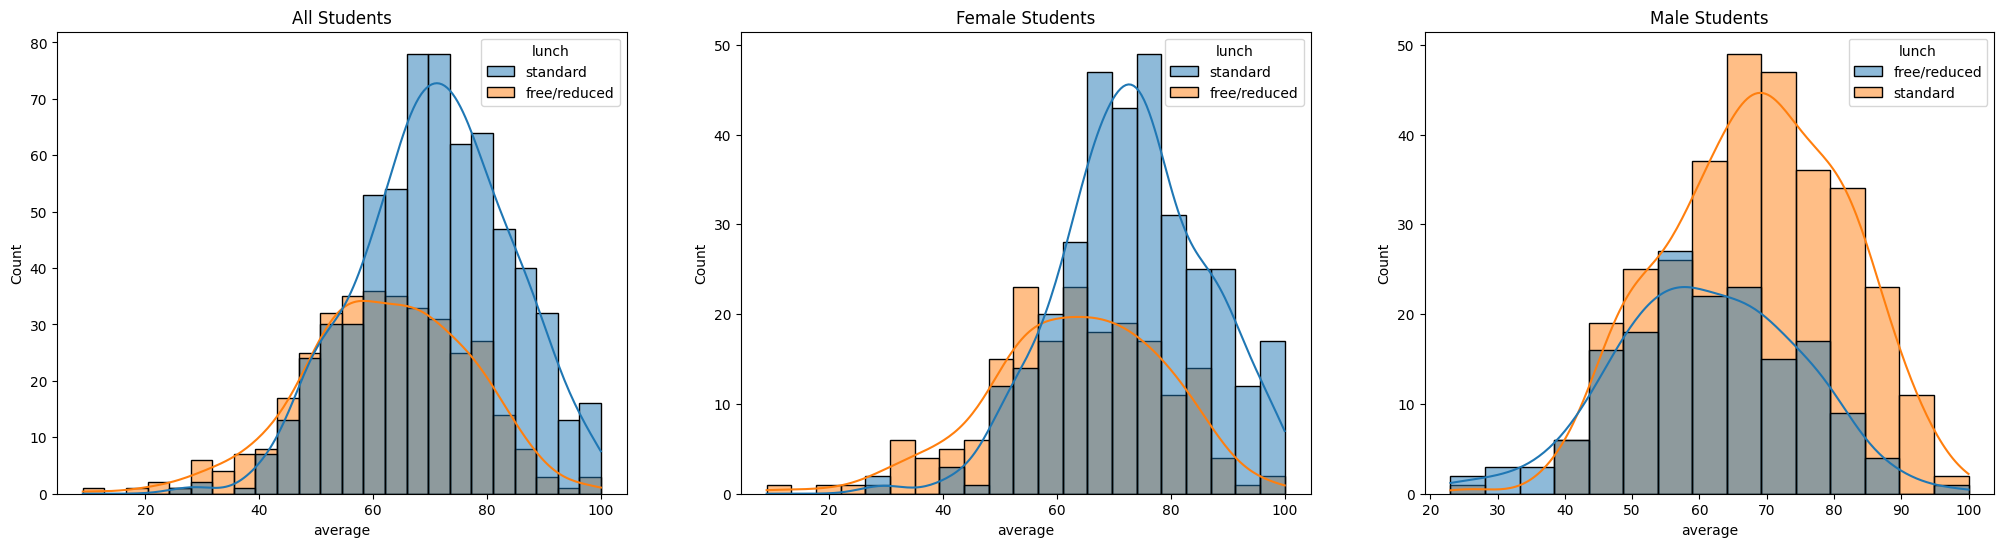

In [32]:
# Create 3 subplots in one row
fig,axs = plt.subplots(1,3,figsize=(25,6))
# Plot 1: All student
sns.histplot(data=df,x='average',kde=True, hue='lunch',ax=axs[0])
axs[0].set_title("All Students")
# Plot 2: Female students
sns.histplot(data=df[df.gender=='female'],x='average',kde=True, hue='lunch',ax=axs[1])
axs[1].set_title("Female Students")
# Plot 3: Male students
sns.histplot(data=df[df.gender=='male'],x='average',kde=True, hue='lunch',ax=axs[2])
axs[2].set_title("Male Students")

#plt.tight_layout()
plt.show()

##### Insights and Observations
1) Standard Lunch helps perform well in exams (histplot 1)
2) Standard Lunch helps perform well in exams be it male or female (histplot 2 and histplot 3)